practica en la Clase 24/04/24

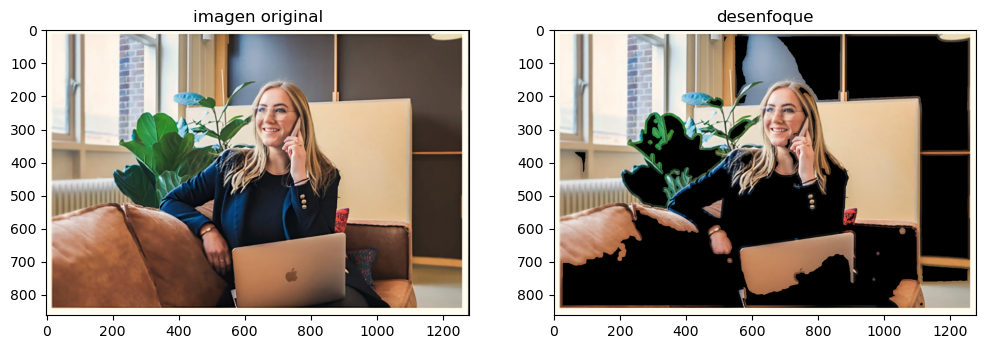

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('imgAtratar.png')  

imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

umbral_valor = 127  
_, imagen_binaria = cv2.threshold(imagen_gris, umbral_valor, 255, cv2.THRESH_BINARY)
imagen_binaria_suavizada = cv2.GaussianBlur(imagen_binaria, (15, 15), 0)
mascara = np.zeros_like(imagen)
mascara[imagen_binaria_suavizada != 0] = imagen[imagen_binaria_suavizada != 0]

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('imagen original')

plt.subplot(122)
plt.imshow(cv2.cvtColor(mascara, cv2.COLOR_BGR2RGB))
plt.title('desenfoque')

plt.show()


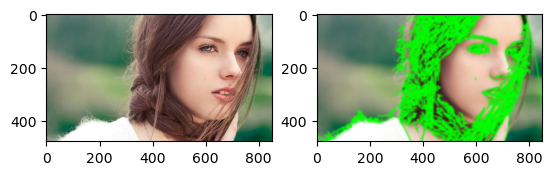

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def desenfoque_sector_con_contornos(img, centro, x, y):
    img = np.copy(img)
    valx, valy = centro
    mediox = x // 2
    medioy = y // 2
    mascara = np.zeros_like(img, dtype=np.uint8)
    cv2.ellipse(mascara, (valx, valy), (mediox, medioy), 0, 0, 360, (255, 255, 255), -1)
    img_mascara = cv2.bitwise_and(img, mascara)
    
    gray_img = cv2.cvtColor(img_mascara, cv2.COLOR_RGB2GRAY)
    canny_edges = cv2.Canny(gray_img, 50, 150)
    contours, hierarchy = cv2.findContours(canny_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(img, contours, -1, (0, 255, 0), 2)
    
    desenfoque = cv2.GaussianBlur(img, (15, 15), 0)
    
    return desenfoque

Image = cv2.imread('girl.jpg')
Image = cv2.cvtColor(Image, cv2.COLOR_BGR2RGB)
img_fin = desenfoque_sector_con_contornos(Image, (350, 500), 1000, 2000)

plt.subplot(121)
plt.imshow(Image)
plt.subplot(122)
plt.imshow(img_fin)
plt.show()